In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,auc,roc_curve,mean_squared_error
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD

In [329]:
fraud_df = pd.read_csv('train_data.csv')
fraud_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43178,124525.0,1.385059,-1.179244,-0.784208,1.283540,-0.447639,0.580909,-0.308545,0.254747,0.859553,...,0.011919,-0.615504,0.118120,0.191244,-0.503095,-0.989852,-0.010946,0.014582,290.00,0
94487,63331.0,0.418000,-1.883278,-0.293045,-0.046266,-1.208340,-0.578036,0.449555,-0.395210,-1.124167,...,-0.092277,-0.631324,-0.375587,0.515639,0.196008,1.045269,-0.131520,0.084434,484.38,0
198787,127690.0,-1.163210,1.819689,-1.219517,-0.537837,0.780608,-1.016884,0.956956,-0.046699,0.561722,...,0.130105,0.876335,-0.292197,-0.794387,-0.175362,-0.123308,0.369075,0.234858,20.00,0
136690,27042.0,-5.366123,4.643370,-2.740651,1.070163,-2.816165,-0.369292,-2.648443,3.860014,0.252783,...,0.039252,-0.163740,0.383611,-0.342734,0.489811,-0.191159,-0.298490,-0.107467,1.00,0
218039,134301.0,-0.897135,-0.267860,-0.747259,-4.653034,0.599530,-1.525812,1.229997,-0.678144,0.526802,...,-0.223143,0.413810,-0.464338,-0.460029,-0.239400,-1.126537,-0.492763,-0.504003,39.98,0
74012,49904.0,-0.986232,0.596326,1.114020,0.700337,-2.713784,1.541689,3.559688,-0.749336,-0.425815,...,0.007651,0.720698,0.054753,0.445929,-0.258458,-0.458757,0.149987,-0.292188,640.48,0
202228,135950.0,2.178951,-0.622308,-2.080238,-0.528428,-0.012083,-1.043929,0.134086,-0.352896,-0.944535,...,-0.241439,-0.147867,-0.009265,-0.387507,0.220168,0.835247,-0.111015,-0.094848,23.00,0
199568,162030.0,2.047999,-0.090218,-1.075767,0.414204,-0.142871,-1.135529,0.152558,-0.292161,0.586846,...,-0.285333,-0.702396,0.348303,-0.021610,-0.324976,0.201818,-0.070105,-0.060696,4.49,0
62023,116740.0,0.181659,0.081058,-0.876712,-2.401535,0.927191,-1.317313,1.219914,-0.511480,-1.011352,...,0.361769,1.118656,-0.050518,0.595612,-0.699273,-0.330806,0.250463,0.085093,30.00,0
2549,62315.0,1.262376,-0.281195,-1.638221,-1.035961,2.122561,2.984912,-0.249061,0.656553,-0.146022,...,-0.103782,-0.548609,-0.113351,1.077233,0.569169,1.018483,-0.108979,-0.001332,59.00,0


In [330]:
test_df = pd.read_csv('test_data_hidden.csv')
test_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53861,1230.0,1.334329,0.407315,-0.481604,0.922526,0.352180,-0.745359,0.469484,-0.248350,-0.073102,...,-0.063048,-0.166955,-0.238137,-0.474016,0.930935,-0.240583,-0.015403,0.000296,1.99,0
35096,79928.0,-1.952728,1.899872,0.004840,1.394818,-1.233456,0.233162,0.152193,1.186452,-0.750760,...,0.050095,0.309871,0.000400,0.140408,0.064539,-0.225386,0.143243,-0.016808,134.59,0
38130,165276.0,0.083098,0.809641,-0.292650,-1.070620,1.292480,0.254324,0.875436,0.072994,-0.326509,...,-0.277579,-0.669963,-0.040005,-0.343963,-0.337052,0.151548,0.239533,0.084736,5.99,0
55258,41848.0,-0.795239,0.628992,1.423363,-1.904617,-0.473714,-1.329656,0.428069,-0.422562,-1.220539,...,0.469332,1.076925,-0.196459,0.761469,-0.078695,-0.413084,-0.446066,0.143624,0.76,0
30982,54982.0,-0.845464,0.869338,0.217131,-2.128701,-0.661751,0.337108,-1.954083,-5.225465,0.447424,...,-2.767696,0.008466,-0.061008,-0.475133,1.209925,-0.057015,-0.028920,0.181644,44.85,0
49947,60565.0,-0.431345,1.080222,1.297703,-0.109683,0.334076,-0.164161,0.593999,0.167968,-0.775818,...,-0.174027,-0.400124,-0.000282,-0.012696,-0.235982,0.081617,0.262289,0.086540,6.23,0
15846,144909.0,1.791783,-1.756259,0.370037,-0.057241,-1.866608,0.635322,-1.679270,0.282456,1.079039,...,-0.162863,0.079167,0.204181,0.771940,-0.599379,0.645644,0.022554,-0.001319,140.03,0
55070,75168.0,-0.551300,1.298869,0.770355,0.784370,0.187887,-0.135477,0.388886,0.407227,-0.838790,...,0.205746,0.563535,-0.129924,-0.264549,-0.252578,-0.281303,0.065856,0.095329,8.00,0
2838,148548.0,-0.557814,0.721347,-0.684318,-0.574466,1.976051,0.520999,0.473050,0.328358,-0.158788,...,0.362999,1.346165,-0.311946,-1.703477,-0.621892,-0.039102,0.435161,0.257670,1.50,0
41139,53272.0,1.238282,0.338649,0.199657,0.493010,-0.098541,-0.543609,0.015548,-0.068321,-0.292494,...,-0.251456,-0.730947,0.069080,-0.026555,0.250444,0.095757,-0.023425,0.018425,1.29,0


In [331]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [332]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

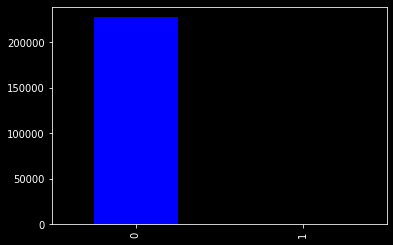

In [333]:
with plt.style.context('dark_background'):
    fraud_df['Class'].value_counts().plot(kind="bar", color="blue")

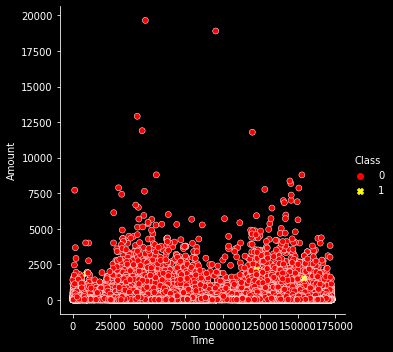

In [334]:
with plt.style.context('dark_background'):
    sns.relplot(data = fraud_df, x = 'Time', y = 'Amount' , hue = 'Class', style = 'Class', palette = ['red','yellow'])

In [335]:
frauds = fraud_df[fraud_df.Class == 1]
normal = fraud_df[fraud_df.Class == 0]

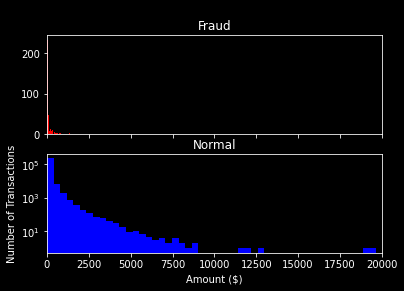

In [336]:
with plt.style.context('dark_background'):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins, color = 'red')
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins, color = 'blue')
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

Text(0, 0.5, 'Amount')

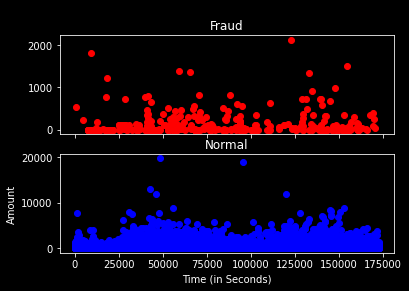

In [337]:
with plt.style.context('dark_background'):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount, color='red')
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount, color='blue')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

In [338]:
X_train = fraud_df.drop('Class', axis=1)
y_train = fraud_df['Class']

In [339]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

- Data prepreation

In [340]:
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

In [341]:
X_test.shape, y_test.shape

((56962, 30), (56962,))

- Apply IsolationForest for finding outlier

In [342]:
model = IsolationForest(n_estimators=200, n_jobs = -1)
model.fit(X_train)
score = model.decision_function(X_train)
test_score = model.decision_function(X_test)

In [343]:
X_train_score = np.column_stack([X_train,score])
X_test_score = np.column_stack([X_test,test_score])

In [344]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [345]:
def model_training(model, X_train = X_train, y_train = y_train, X_test = X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [346]:
def model_score(y_pred):
    return [confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred, output_dict = True)]

In [347]:
def test(X_train = X_train_scaler, y_train = y_train, X_test = X_test_scaler):
    result = []
    result.append(model_score(model_training(MultinomialNB(**nb_params),X_train,y_train,X_test)))
    result.append(model_score(model_training(RandomForestClassifier(**rf_params,n_jobs = -1),X_train,y_train,X_test)))
    result.append(model_score(model_training(XGBClassifier(**XGB_params,n_jobs = -1,use_label_encoder=False),X_train,y_train,X_test)))
    result.append(model_score(model_training(DecisionTreeClassifier(**dt_params),X_train,y_train,X_test)))
    result.append(model_score(model_training(LogisticRegression(**lr,n_jobs = -1),X_train,y_train,X_test)))
    return result

In [348]:
def plot_result():
  evaluation_results = pd.DataFrame(np.zeros((5,4)), columns=['Accuracy', 'Macro AVG Precision','Macro AVG Recall','Macro AVG F1-score'])
  evaluation_results.index=index
  for i in range(len(result)):
      evaluation_results.iloc[i]['Accuracy'] = result[i][1]['accuracy']
      evaluation_results.iloc[i]['Macro AVG F1-score'] = result[i][1]['macro avg']['f1-score']  
      evaluation_results.iloc[i]['Macro AVG Precision'] = result[i][1]['macro avg']['precision']
      evaluation_results.iloc[i]['Macro AVG Recall'] = result[i][1]['macro avg']['recall']
  with plt.style.context('dark_background'):
    plt.figure(figsize=(13.42,7))
    f = sns.heatmap(evaluation_results, cmap='YlGnBu', annot=True, fmt='.3f')
    f.set_title("Model score" , color = "white")
    plt.xlabel("Score " , color = "white")
    plt.ylabel("Models " , color = "white")

index = ['Naïve Bayes Classifier (NB)','Random Forest Classifier (RF)','XGBClassifier (XGB)',
         'Decision Tree Classifier (DT)','Logistic Regression (LR)']

In [349]:
def plot_matrix():
  colors = ['coolwarm', 'icefire']
  size  = len(result)//2
  with plt.style.context('dark_background'):
    fig, axs = plt.subplots(size,2 ,figsize=(15,15))
  count = 0
  for i in range(size):
    for j in range(2):
          f = sns.heatmap(result[count][0],cmap= colors[j], annot=True, fmt='d',ax=axs[i][j] , cbar=(i,j))
          axs[i][j].set_title('Confusion Matrix for {}'.format(index[count]) , color = "white")
          axs[i][j].set_xlabel("Predicted label " , color = "white")
          axs[i][j].set_ylabel("True label " , color = "white")
          count+=1
          if(count >len(result)):
            break
  plt.show()
  if(size == 2):
    with plt.style.context('dark_background'):
          plt.figure(figsize=(15/2,15/2))
          f = sns.heatmap(result[4][0],cmap = 'coolwarm', annot=True, fmt='d')
          f.set_title('Confusion Matrix for {}'.format(index[4]) , color = "white")
          plt.xlabel("Predicted label " , color = "white")
          plt.ylabel("True label " , color = "white")
          plt.show()


- Try to detect fraud without applying anamoly algorithm

In [350]:
nb_params = {
    "class_prior":[0.396, 0.5],
    'alpha': 0.01
}

rf_params = {
    'max_depth':20,
     'n_estimators': 75,
     'class_weight': 'balanced',
     'criterion':'entropy',
     'bootstrap':False
}
XGB_params = {
    'objective': 'binary:logistic',
    'max_depth': 40,
    'learning_rate': 0.01,
    'verbosity': 0,
    'n_estimators': 100,
    'early_stopping_round':10,
}

dt_params = {
        'max_depth':21,
}

lr = {
    'class_weight':'balanced',
    'C' : 0.1,
    'solver':'lbfgs',
    'penalty' : 'l2', 
    'max_iter':10000, 
    'multi_class':'ovr'
}
result = test()

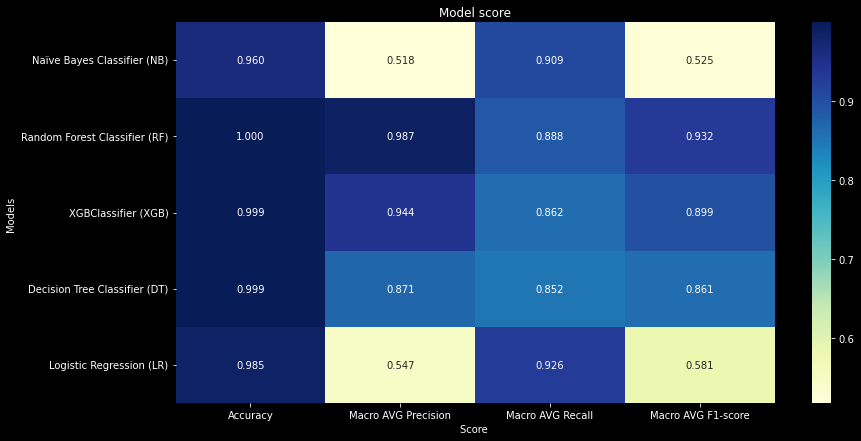

In [351]:
plot_result()

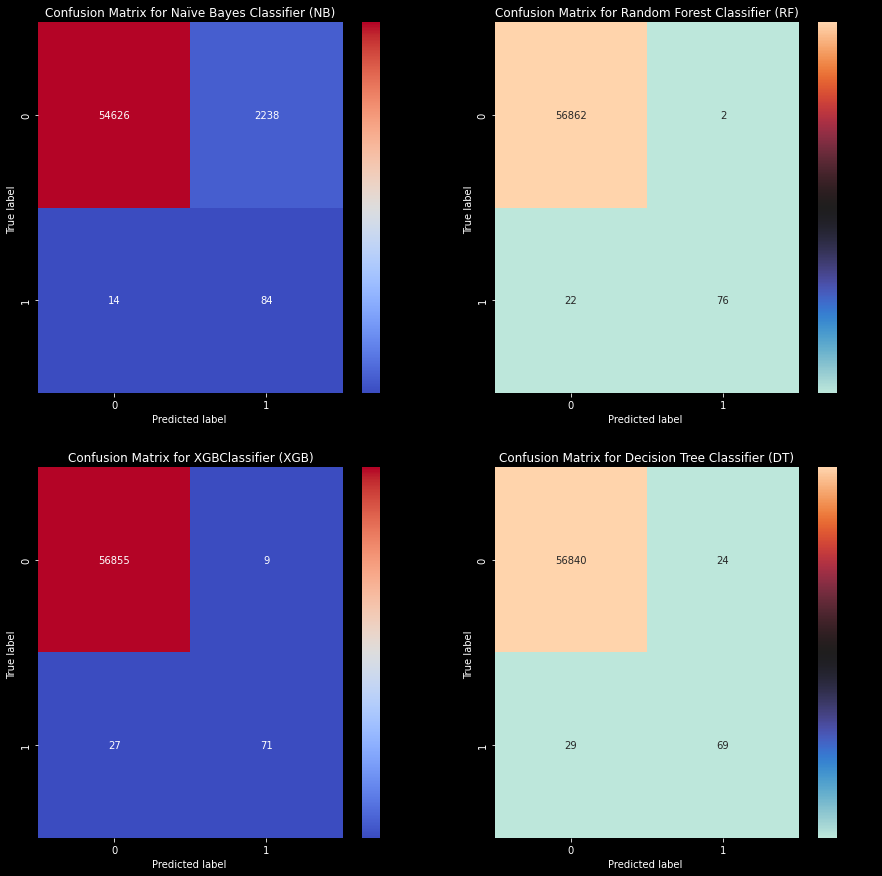

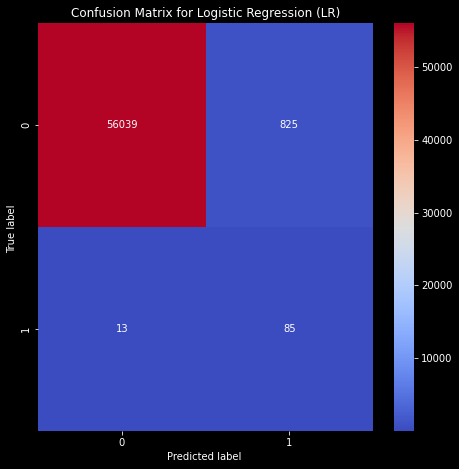

In [352]:
plot_matrix()

In [353]:
ros = RandomOverSampler(random_state=1)
X_res, y_res = ros.fit_resample(X_train_scaler, y_train)

In [354]:
result = test(X_res,y_res, X_test_scaler)

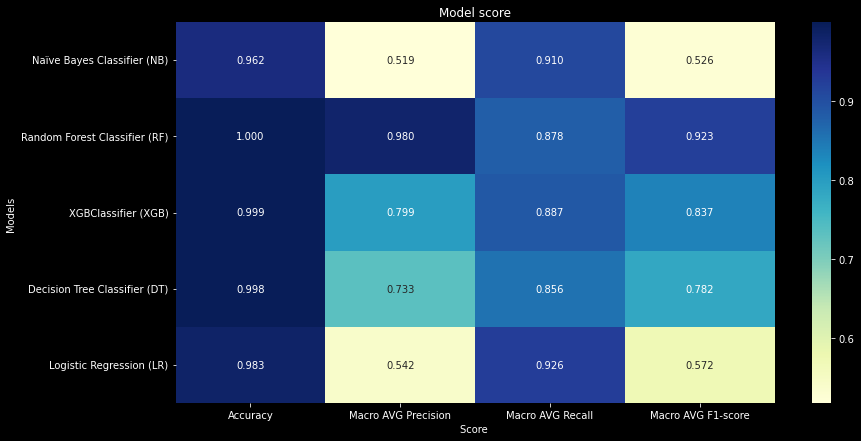

In [355]:
plot_result()

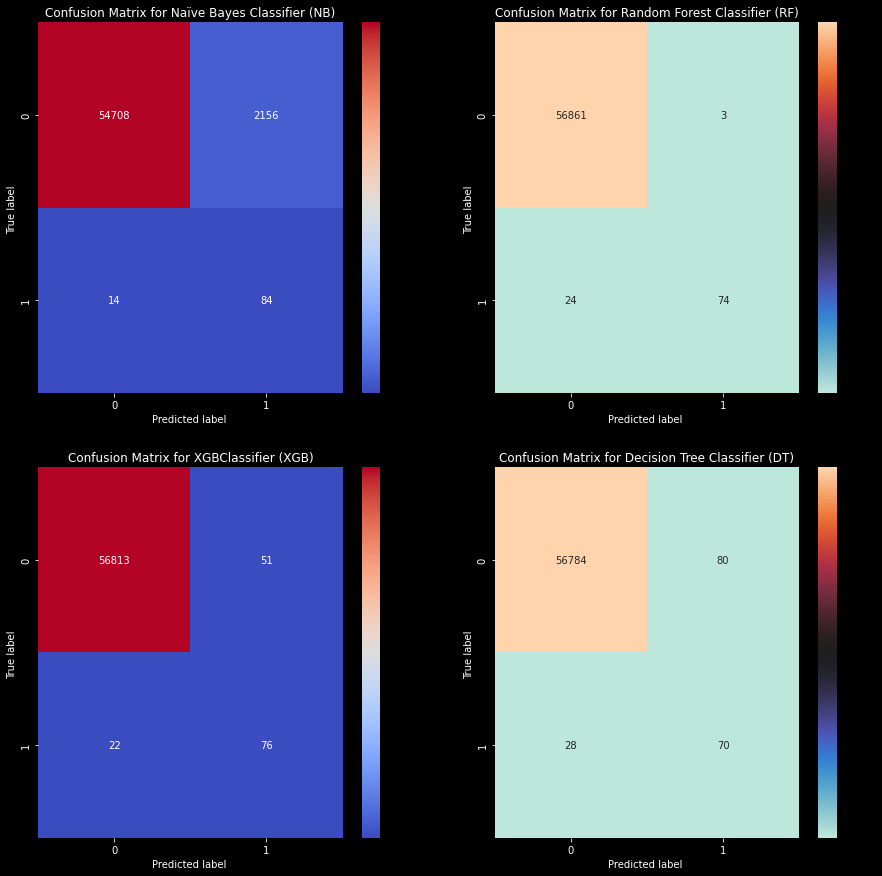

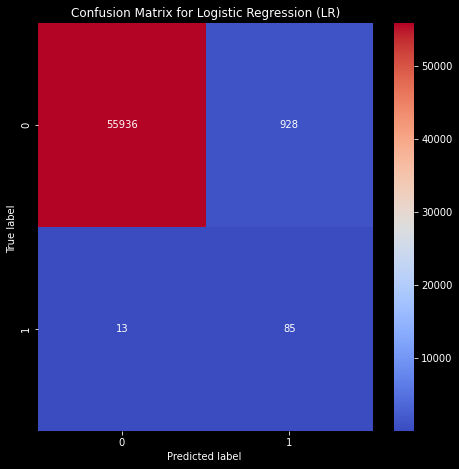

In [356]:
plot_matrix()

In [357]:
oversample = SMOTE(n_jobs = -1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_scaler, y_train)

X_train_smote.shape,y_train_smote.shape

((454902, 30), (454902,))

In [358]:
result = test(X_train_smote,y_train_smote, X_test_scaler)

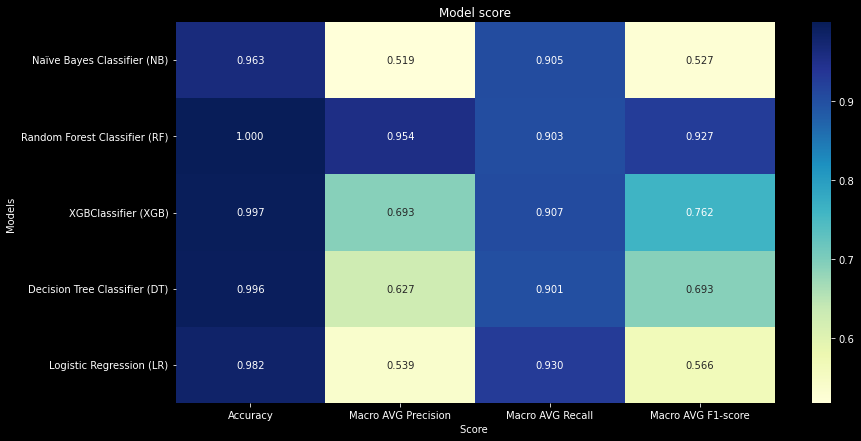

In [359]:
plot_result()

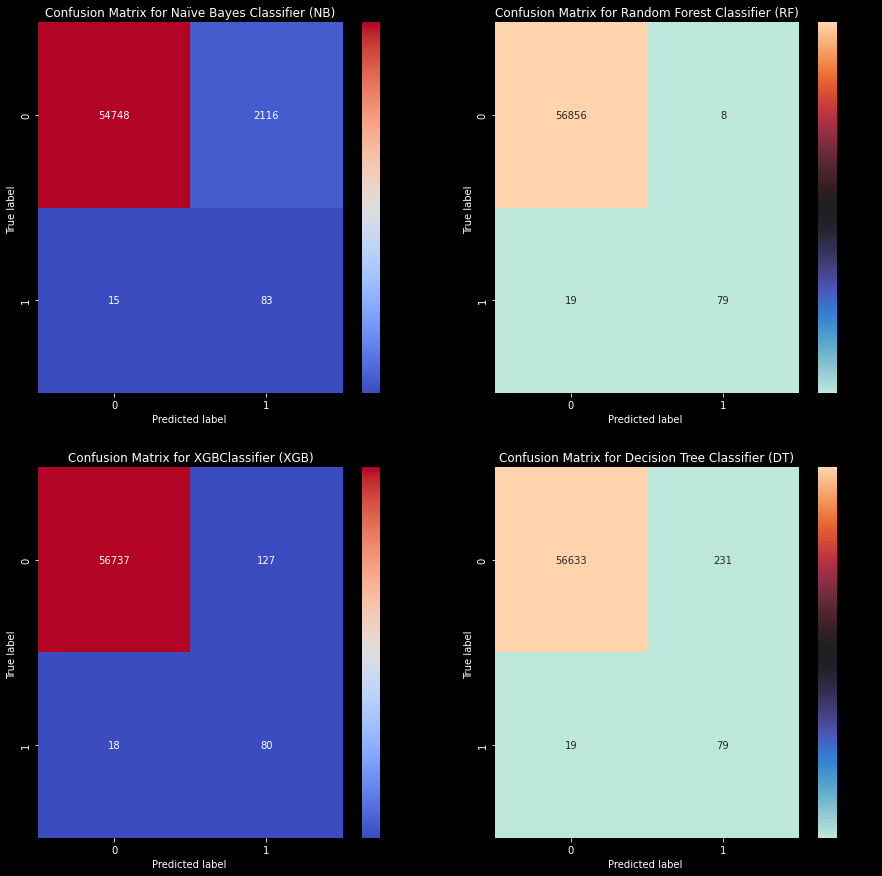

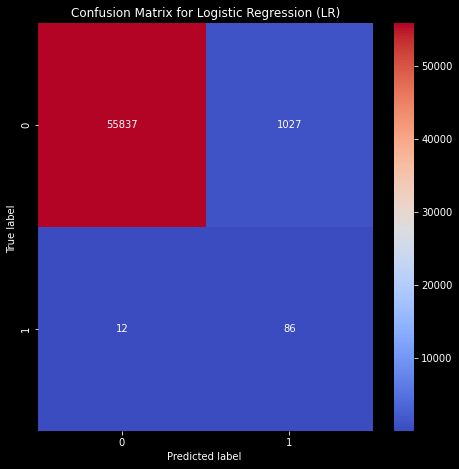

In [360]:
plot_matrix()

- Apply ANN on data without outlier score

In [361]:
def build_model(input_shape = X_train_scaler.shape[1]):
    model = Sequential()

    model.add(Dense(200, activation = 'relu',kernel_initializer="HeUniform" , input_shape = (input_shape,)))

    model.add(Dense(250, activation = 'relu', kernel_initializer="HeUniform"))

    model.add(Dense(350, activation = 'relu', kernel_initializer="HeUniform" ))


    model.add(Dense(1, activation = 'sigmoid'))


    auc = metrics.AUC(
        num_thresholds=200, curve='ROC',
        summation_method='interpolation'
    )
    recall = metrics.Recall()
    optimizer = SGD()

    model.compile(optimizer =optimizer, loss = 'binary_crossentropy', metrics = [recall , auc , 'accuracy' ])
    return model

In [362]:
model = build_model()
history = model.fit(X_train_scaler , y_train, validation_data = (X_test_scaler, y_test) , epochs = 10 , batch_size = 32)

Epoch 1/10
7121/7121 [==============================] - 128s 18ms/step - loss: 0.0111 - recall_13: 0.0000e+00 - auc_13: 0.7173 - accuracy: 0.9981 - val_loss: 0.0098 - val_recall_13: 0.0000e+00 - val_auc_13: 0.7499 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 106s 15ms/step - loss: 0.0083 - recall_13: 0.0635 - auc_13: 0.8753 - accuracy: 0.9984 - val_loss: 0.0076 - val_recall_13: 0.1327 - val_auc_13: 0.8620 - val_accuracy: 0.9984
Epoch 3/10
7121/7121 [==============================] - 100s 14ms/step - loss: 0.0064 - recall_13: 0.2563 - auc_13: 0.9020 - accuracy: 0.9986 - val_loss: 0.0065 - val_recall_13: 0.2653 - val_auc_13: 0.8621 - val_accuracy: 0.9986
Epoch 4/10
7121/7121 [==============================] - 114s 16ms/step - loss: 0.0054 - recall_13: 0.3883 - auc_13: 0.9095 - accuracy: 0.9988 - val_loss: 0.0057 - val_recall_13: 0.3980 - val_auc_13: 0.8926 - val_accuracy: 0.9988
Epoch 5/10
7121/7121 [==============================] - 117s 16ms/step - los

In [363]:
def model_matrix():
    with plt.style.context('dark_background'):
        cm = confusion_matrix(y_test, y_pred)
        f = sns.heatmap(cm, annot=True, fmt='d')
        f.set_title("confusion_matrix" , color = "white")
        plt.xlabel("Predicted label " , color = "white")
        plt.ylabel("True label " , color = "white")
        plt.show()

def model_class_report(name):
    target_names = [str(i) for i in range(0,2)]
    class_report = pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names, output_dict= True))
    with plt.style.context('dark_background'):
      plt.figure(figsize=(13.42,7))
      f = sns.heatmap(class_report.iloc[:-1, :].T, cmap='YlGnBu', annot=True, fmt='.3f')
      f.set_title('{} score'.format(name) , color = "white")
      plt.xlabel("Score " , color = "white")
      plt.ylabel("Models " , color = "white")

def model_accuracy_report():
    with plt.style.context('dark_background'):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
def model_loss_report():
    with plt.style.context('dark_background'):
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'test'], loc='upper left')
      plt.show()


In [364]:
Y_pred = model.predict(X_test_scaler)
y_pred = np.round(Y_pred)

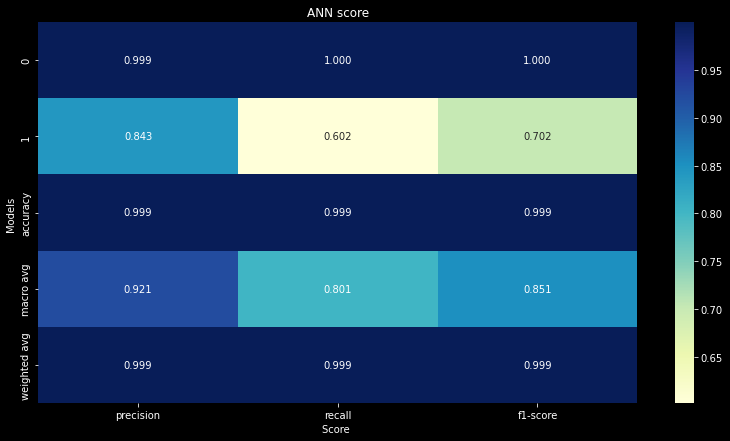

In [365]:
model_class_report('ANN')

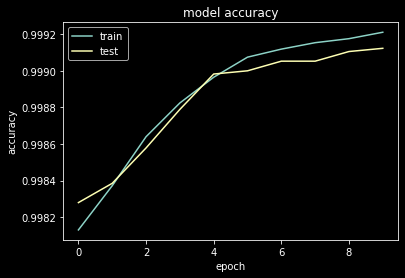

In [366]:
model_accuracy_report()

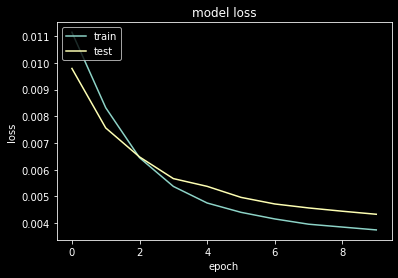

In [367]:
model_loss_report()

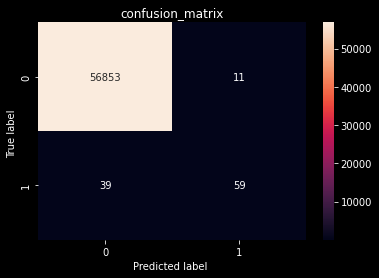

In [368]:
model_matrix()

-ANN with random oversampling

In [369]:
model = build_model()
history = model.fit(X_res, y_res, validation_data = (X_test_scaler, y_test) , epochs = 10 , batch_size = 32)

Epoch 1/10
14216/14216 [==============================] - 205s 14ms/step - loss: 0.1679 - recall_14: 0.9000 - auc_14: 0.9780 - accuracy: 0.9375 - val_loss: 0.1629 - val_recall_14: 0.8980 - val_auc_14: 0.9784 - val_accuracy: 0.9620
Epoch 2/10
14216/14216 [==============================] - 221s 16ms/step - loss: 0.1377 - recall_14: 0.9188 - auc_14: 0.9858 - accuracy: 0.9464 - val_loss: 0.2228 - val_recall_14: 0.9082 - val_auc_14: 0.9814 - val_accuracy: 0.9304
Epoch 3/10
14216/14216 [==============================] - 220s 15ms/step - loss: 0.1219 - recall_14: 0.9297 - auc_14: 0.9894 - accuracy: 0.9519 - val_loss: 0.1745 - val_recall_14: 0.9184 - val_auc_14: 0.9831 - val_accuracy: 0.9468
Epoch 4/10
14216/14216 [==============================] - 196s 14ms/step - loss: 0.1033 - recall_14: 0.9435 - auc_14: 0.9928 - accuracy: 0.9596 - val_loss: 0.0685 - val_recall_14: 0.8673 - val_auc_14: 0.9844 - val_accuracy: 0.9797
Epoch 5/10
14216/14216 [==============================] - 185s 13ms/step - l

In [370]:
Y_pred = model.predict(X_test_scaler)
y_pred = np.round(Y_pred)

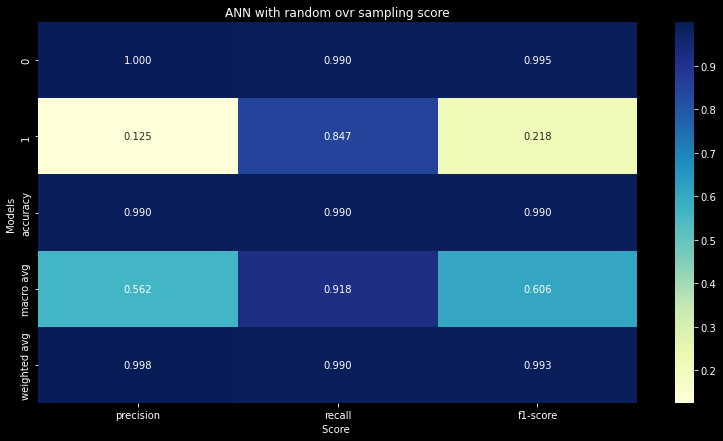

In [371]:
model_class_report('ANN with random ovr sampling')

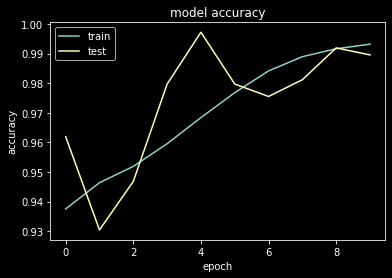

In [372]:
model_accuracy_report()

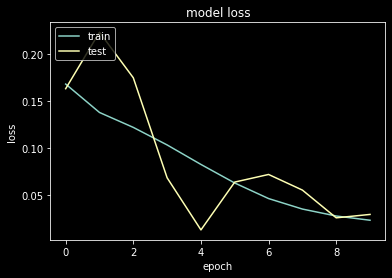

In [373]:
model_loss_report()

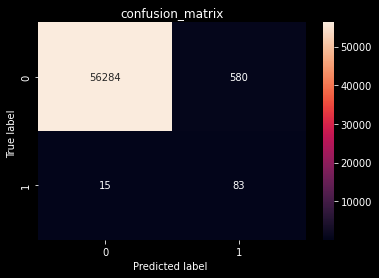

In [374]:
model_matrix()

In [375]:
model = build_model()
history = model.fit(X_train_smote, y_train_smote, validation_data = (X_test_scaler, y_test) , epochs = 10 , batch_size = 32)

Epoch 1/10
14216/14216 [==============================] - 226s 16ms/step - loss: 0.1533 - recall_15: 0.9081 - auc_15: 0.9826 - accuracy: 0.9409 - val_loss: 0.0951 - val_recall_15: 0.8776 - val_auc_15: 0.9760 - val_accuracy: 0.9776
Epoch 2/10
14216/14216 [==============================] - 212s 15ms/step - loss: 0.1242 - recall_15: 0.9295 - auc_15: 0.9894 - accuracy: 0.9506 - val_loss: 0.2237 - val_recall_15: 0.9082 - val_auc_15: 0.9757 - val_accuracy: 0.9258
Epoch 3/10
14216/14216 [==============================] - 180s 13ms/step - loss: 0.1057 - recall_15: 0.9431 - auc_15: 0.9926 - accuracy: 0.9572 - val_loss: 0.0940 - val_recall_15: 0.8776 - val_auc_15: 0.9768 - val_accuracy: 0.9701
Epoch 4/10
14216/14216 [==============================] - 188s 13ms/step - loss: 0.0845 - recall_15: 0.9583 - auc_15: 0.9954 - accuracy: 0.9663 - val_loss: 0.0710 - val_recall_15: 0.8776 - val_auc_15: 0.9763 - val_accuracy: 0.9745
Epoch 5/10
14216/14216 [==============================] - 211s 15ms/step - l

In [376]:
Y_pred = model.predict(X_test_scaler)
y_pred = np.round(Y_pred)

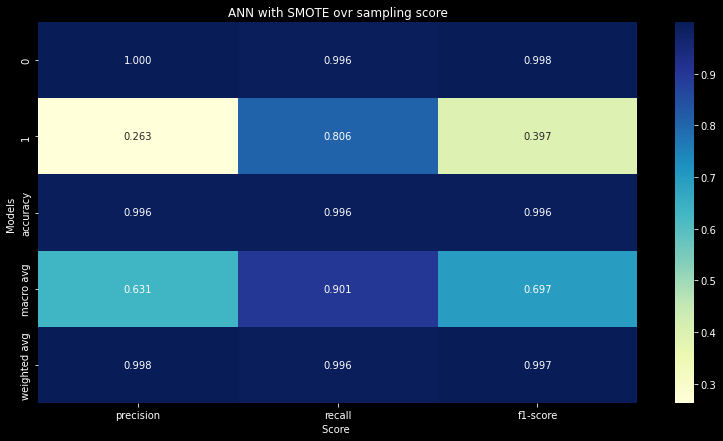

In [377]:
model_class_report('ANN with SMOTE ovr sampling')

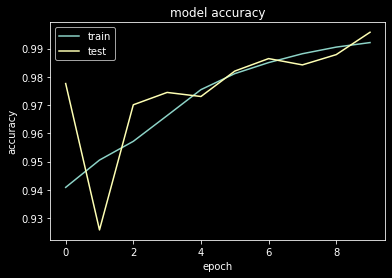

In [378]:
model_accuracy_report()

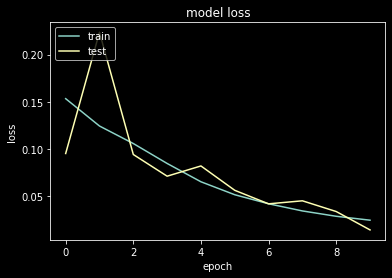

In [379]:
model_loss_report()

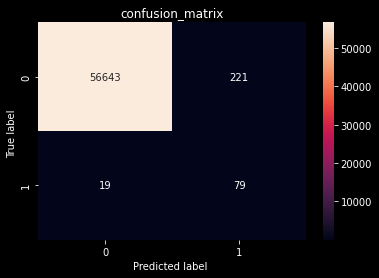

In [380]:
model_matrix()

- Now apply all above with added score

In [381]:
X_train_score_scaler = scaler.fit_transform(X_train_score)
X_test_score_scaler = scaler.transform(X_test_score)

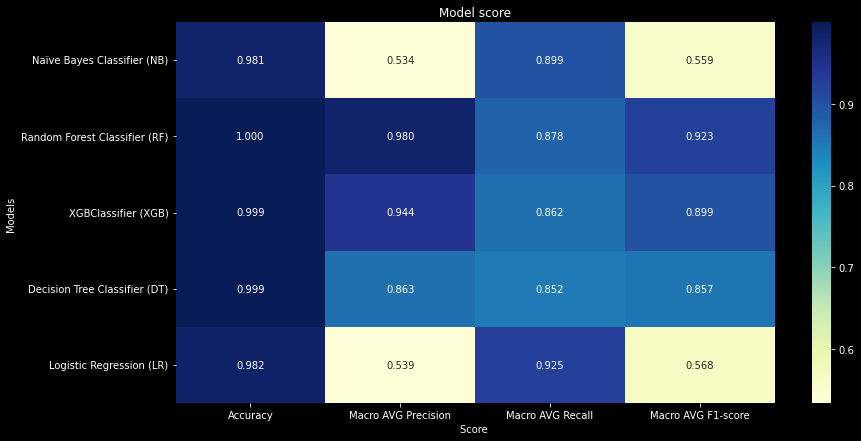

In [382]:
nb_params = {
    "class_prior":[0.396, 0.5],
    'alpha': 0.01
}

rf_params = {
    'max_depth':20,
     'n_estimators': 75,
     'class_weight': 'balanced',
     'criterion':'entropy',
     'bootstrap':False
}
XGB_params = {
    'objective': 'binary:logistic',
    'max_depth': 40,
    'learning_rate': 0.01,
    'verbosity': 0,
    'n_estimators': 100,
    'early_stopping_round':10,
}

dt_params = {
        'max_depth':21,
}

lr = {
    'class_weight':'balanced',
    'C' : 0.1,
    'solver':'lbfgs',
    'penalty' : 'l2', 
    'max_iter':10000, 
    'multi_class':'ovr'
}
result = test(X_train_score_scaler, y_train, X_test_score_scaler)
plot_result()

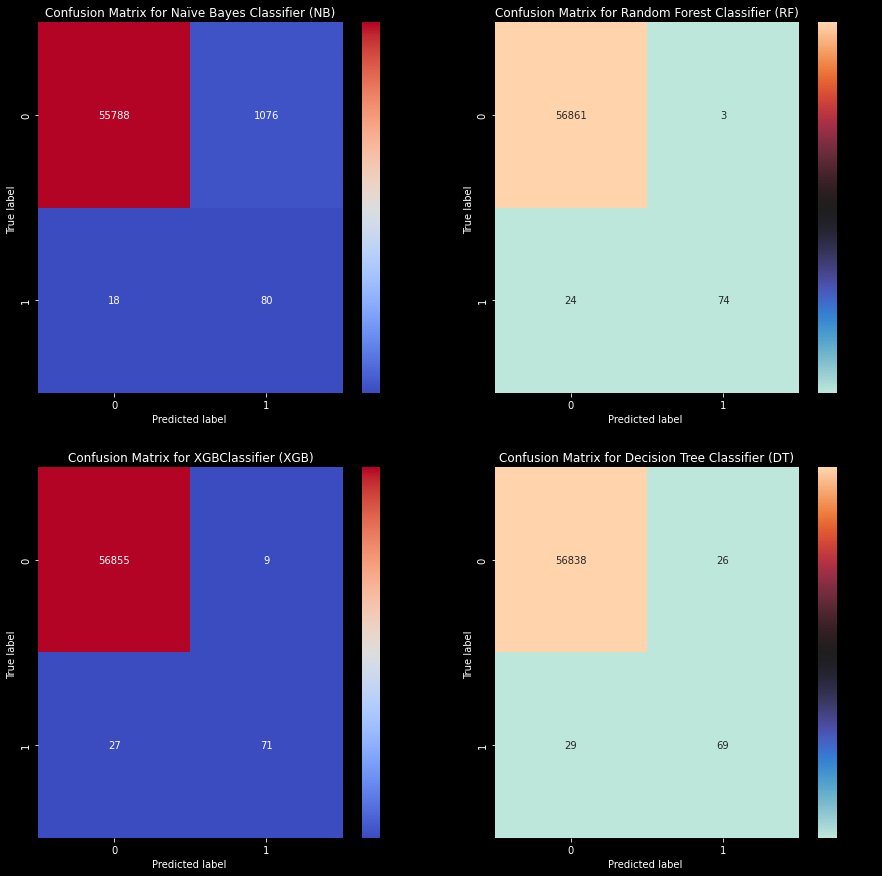

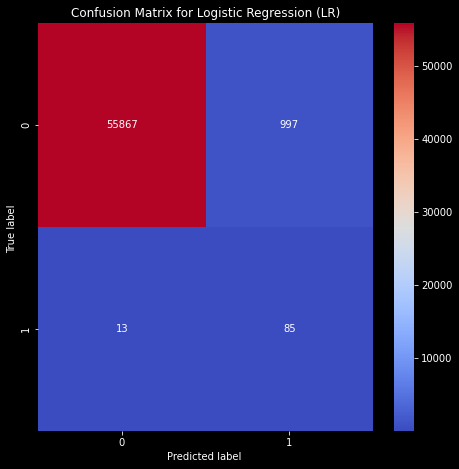

In [383]:
plot_matrix()

- Apply ROS and SMOTE

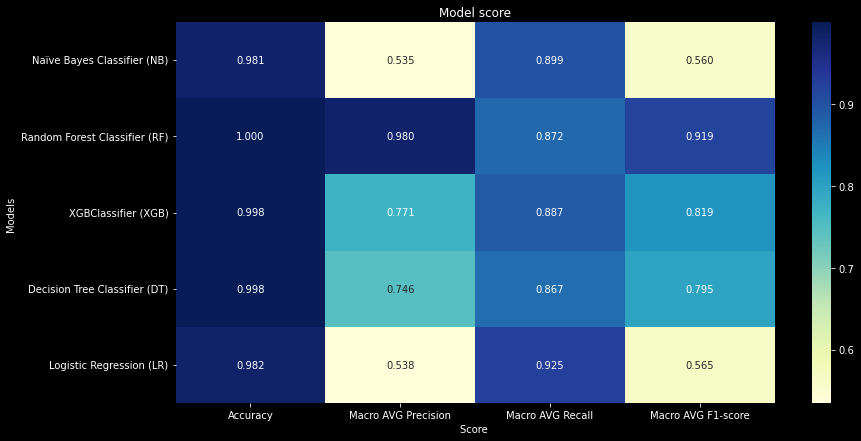

In [384]:
ros = RandomOverSampler(random_state=1)
X_res, y_res = ros.fit_resample(X_train_score_scaler, y_train)
result = test(X_res, y_res, X_test_score_scaler)
plot_result()

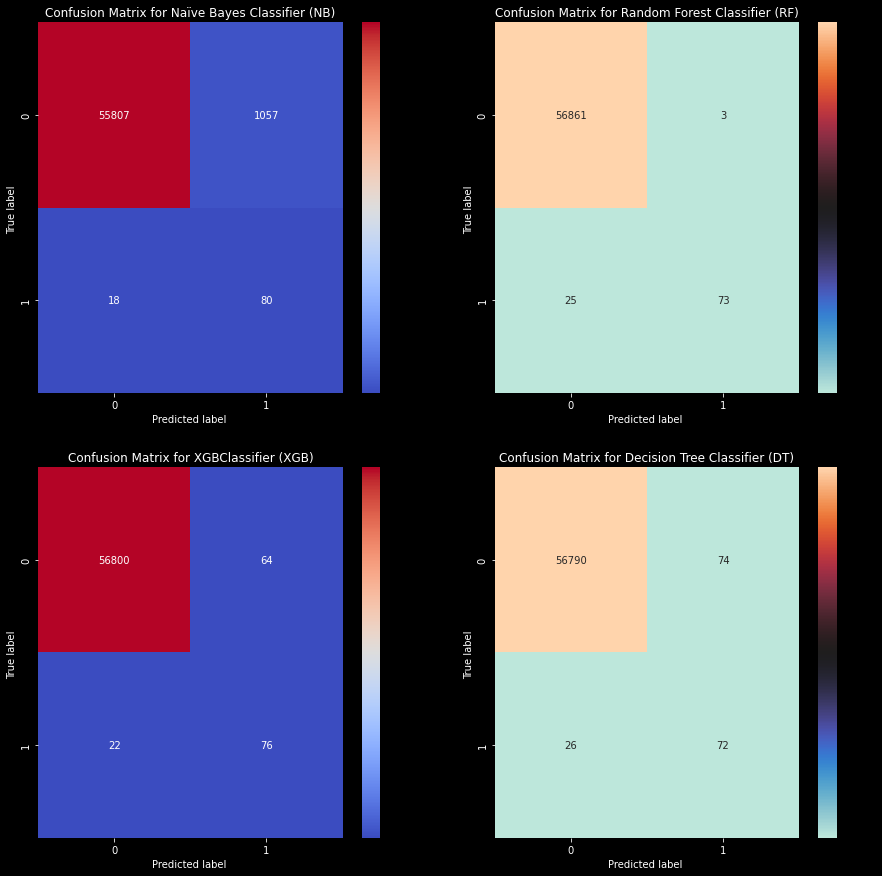

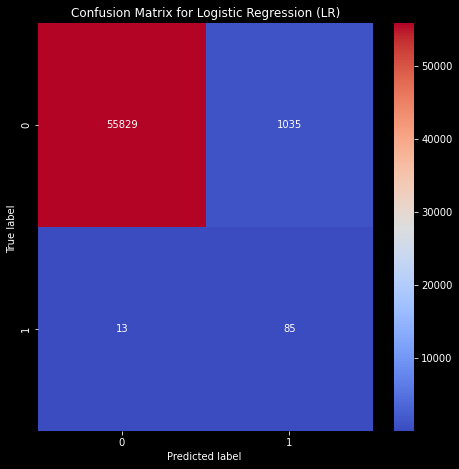

In [385]:
plot_matrix()

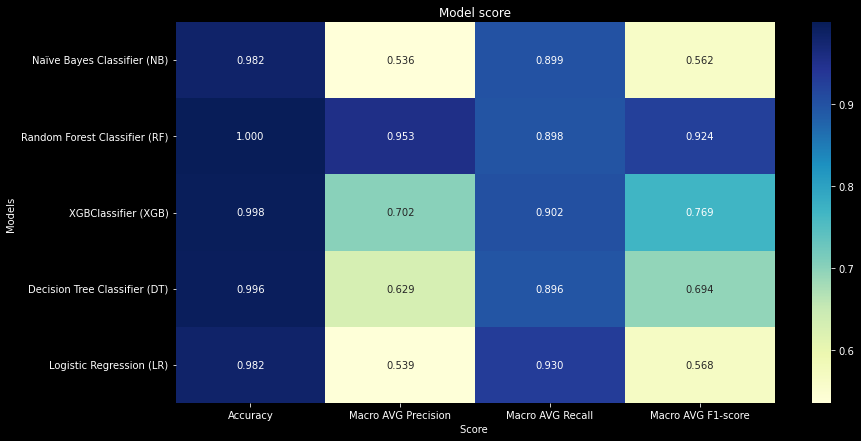

In [386]:
oversample = SMOTE(n_jobs = -1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train_score_scaler, y_train)

result = test(X_train_smote, y_train_smote, X_test_score_scaler)
plot_result()

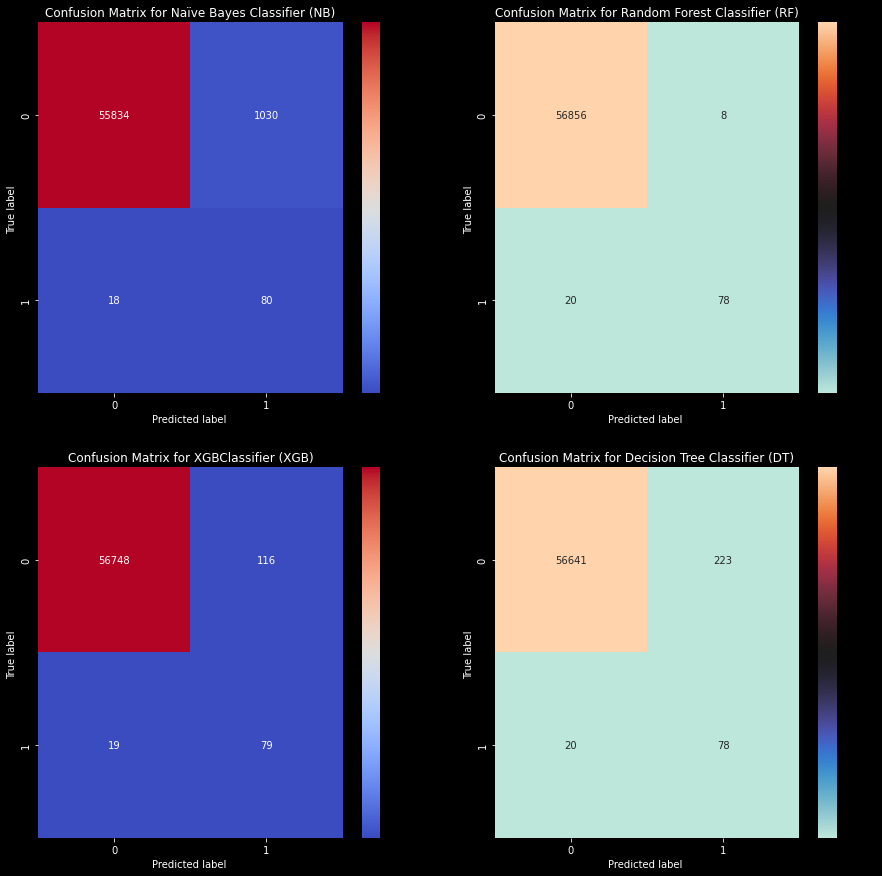

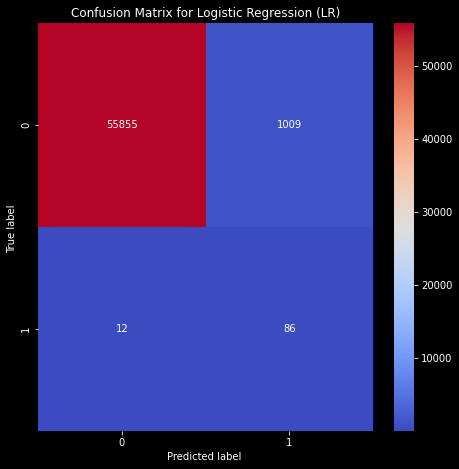

In [387]:
plot_matrix()

- Apply ANN

In [388]:
model = build_model(X_train_score_scaler.shape[1])
history = model.fit(X_train_score_scaler, y_train, validation_data = (X_test_score_scaler, y_test) , epochs = 10 , batch_size = 32)

Epoch 1/10
7121/7121 [==============================] - 103s 14ms/step - loss: 0.0097 - recall_16: 0.0000e+00 - auc_16: 0.8425 - accuracy: 0.9982 - val_loss: 0.0080 - val_recall_16: 0.0000e+00 - val_auc_16: 0.9067 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 114s 16ms/step - loss: 0.0065 - recall_16: 0.1548 - auc_16: 0.9184 - accuracy: 0.9985 - val_loss: 0.0060 - val_recall_16: 0.2449 - val_auc_16: 0.9066 - val_accuracy: 0.9985
Epoch 3/10
7121/7121 [==============================] - 116s 16ms/step - loss: 0.0051 - recall_16: 0.3706 - auc_16: 0.9196 - accuracy: 0.9988 - val_loss: 0.0052 - val_recall_16: 0.4490 - val_auc_16: 0.9212 - val_accuracy: 0.9989
Epoch 4/10
7121/7121 [==============================] - 113s 16ms/step - loss: 0.0045 - recall_16: 0.4898 - auc_16: 0.9260 - accuracy: 0.9990 - val_loss: 0.0049 - val_recall_16: 0.5510 - val_auc_16: 0.9211 - val_accuracy: 0.9990
Epoch 5/10
7121/7121 [==============================] - 113s 16ms/step - los

In [389]:
Y_pred = model.predict(X_test_score_scaler)
y_pred = np.round(Y_pred)

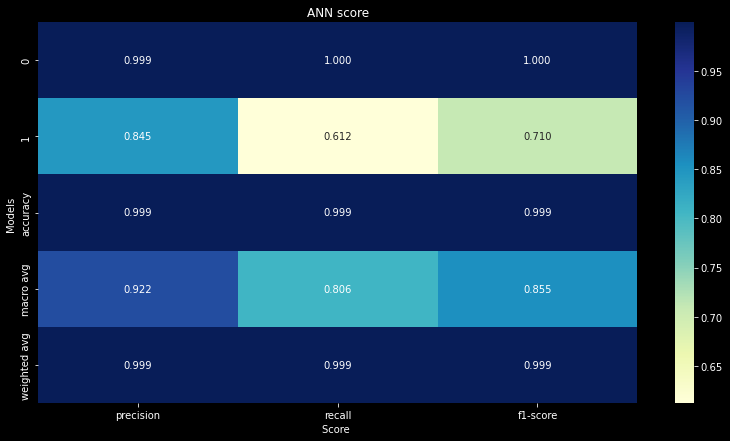

In [390]:
model_class_report('ANN')

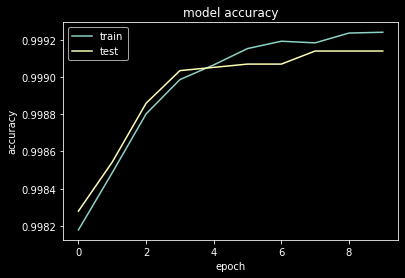

In [391]:
model_accuracy_report()

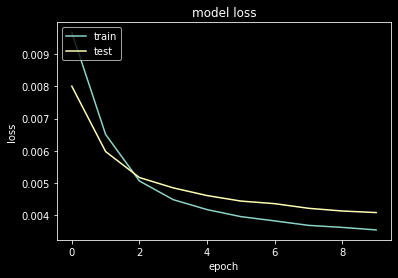

In [392]:
model_loss_report()

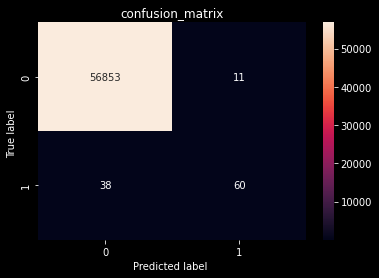

In [393]:
model_matrix()

In [394]:
model = build_model(X_train_score_scaler.shape[1])
history = model.fit(X_res, y_res, validation_data = (X_test_score_scaler, y_test) , epochs = 6 , batch_size = 32)

Epoch 1/6
14216/14216 [==============================] - 216s 15ms/step - loss: 0.1567 - recall_17: 0.9126 - auc_17: 0.9810 - accuracy: 0.9421 - val_loss: 0.1777 - val_recall_17: 0.9082 - val_auc_17: 0.9826 - val_accuracy: 0.9475
Epoch 2/6
14216/14216 [==============================] - 220s 15ms/step - loss: 0.1270 - recall_17: 0.9290 - auc_17: 0.9881 - accuracy: 0.9512 - val_loss: 0.1131 - val_recall_17: 0.8980 - val_auc_17: 0.9833 - val_accuracy: 0.9696
Epoch 3/6
14216/14216 [==============================] - 206s 15ms/step - loss: 0.1069 - recall_17: 0.9416 - auc_17: 0.9922 - accuracy: 0.9578 - val_loss: 0.0393 - val_recall_17: 0.8776 - val_auc_17: 0.9819 - val_accuracy: 0.9904
Epoch 4/6
14216/14216 [==============================] - 191s 13ms/step - loss: 0.0854 - recall_17: 0.9566 - auc_17: 0.9953 - accuracy: 0.9667 - val_loss: 0.0870 - val_recall_17: 0.8980 - val_auc_17: 0.9822 - val_accuracy: 0.9726
Epoch 5/6
14216/14216 [==============================] - 218s 15ms/step - loss: 

In [395]:
Y_pred = model.predict(X_test_score_scaler)
y_pred = np.round(Y_pred)

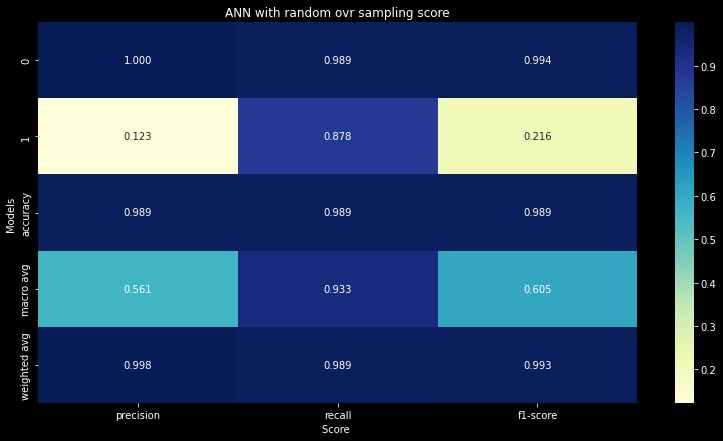

In [396]:
model_class_report('ANN with random ovr sampling')

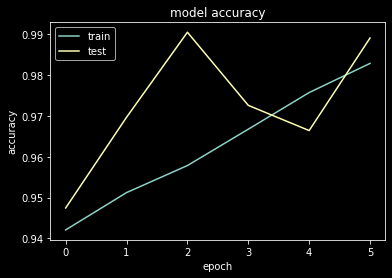

In [397]:
model_accuracy_report()

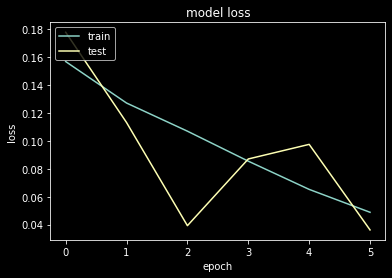

In [398]:
model_loss_report()

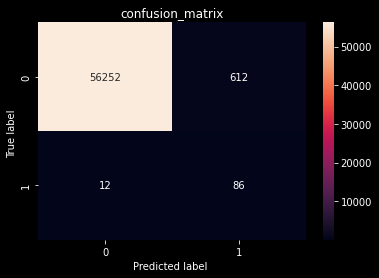

In [399]:
model_matrix()

In [400]:
model = build_model(X_train_score_scaler.shape[1])
history = model.fit(X_train_smote, y_train_smote, validation_data = (X_test_score_scaler, y_test) , epochs = 7 , batch_size = 32)

Epoch 1/7
14216/14216 [==============================] - 196s 14ms/step - loss: 0.1439 - recall_18: 0.9153 - auc_18: 0.9852 - accuracy: 0.9446 - val_loss: 0.0710 - val_recall_18: 0.8776 - val_auc_18: 0.9757 - val_accuracy: 0.9838
Epoch 2/7
14216/14216 [==============================] - 184s 13ms/step - loss: 0.1094 - recall_18: 0.9374 - auc_18: 0.9920 - accuracy: 0.9549 - val_loss: 0.0271 - val_recall_18: 0.8469 - val_auc_18: 0.9806 - val_accuracy: 0.9922
Epoch 3/7
14216/14216 [==============================] - 207s 15ms/step - loss: 0.0864 - recall_18: 0.9570 - auc_18: 0.9952 - accuracy: 0.9654 - val_loss: 0.0647 - val_recall_18: 0.8980 - val_auc_18: 0.9819 - val_accuracy: 0.9789
Epoch 4/7
14216/14216 [==============================] - 213s 15ms/step - loss: 0.0676 - recall_18: 0.9715 - auc_18: 0.9971 - accuracy: 0.9744 - val_loss: 0.0363 - val_recall_18: 0.8673 - val_auc_18: 0.9816 - val_accuracy: 0.9881
Epoch 5/7
14216/14216 [==============================] - 208s 15ms/step - loss: 

In [401]:
Y_pred = model.predict(X_test_score_scaler)
y_pred = np.round(Y_pred)

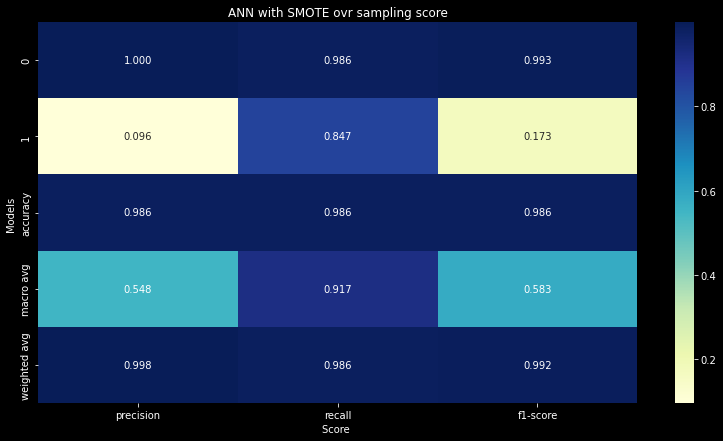

In [402]:
model_class_report('ANN with SMOTE ovr sampling')

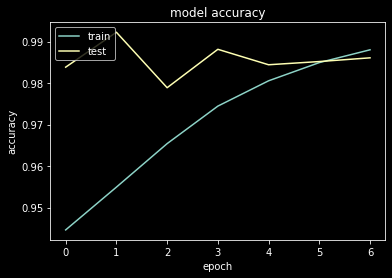

In [403]:
model_accuracy_report()

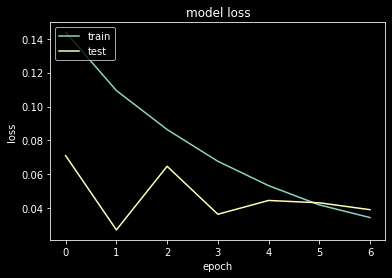

In [404]:
model_loss_report()

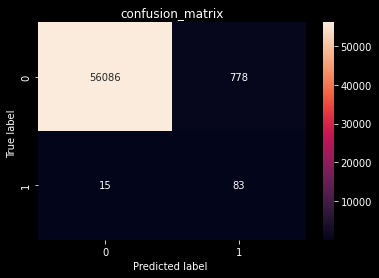

In [405]:
model_matrix()

- AD using deep learning

In [406]:
X_train_normal = X_train_scaler[y_train == 0]
X_test_normal = X_test_scaler[y_test == 0]
X_train_fraud = X_train_scaler[y_train == 1]
X_test_fraud = X_test_scaler[y_test == 1]

- Anamoly detection using AE

In [407]:
input_layer = Input(X_train.shape[1])
model = Sequential()
model.add(input_layer)
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))

In [408]:
model.add(Dense(32,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(X_train.shape[1],activation = 'sigmoid'))

In [409]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 128)               3968      
                                                                 
 dense_83 (Dense)            (None, 32)                4128      
                                                                 
 dense_84 (Dense)            (None, 8)                 264       
                                                                 
 dense_85 (Dense)            (None, 32)                288       
                                                                 
 dense_86 (Dense)            (None, 128)               4224      
                                                                 
 dense_87 (Dense)            (None, 30)                3870      
                                                                 
Total params: 16,742
Trainable params: 16,742
Non-tra

In [410]:
model.compile(optimizer='adam', 
                    loss='mean_squared_error')

In [411]:
history = model.fit(X_train_normal, X_train_normal, validation_data = (X_test_normal, X_test_normal) , epochs = 10 , batch_size = 32)

Epoch 1/10
7108/7108 [==============================] - 63s 9ms/step - loss: 0.0013 - val_loss: 7.3000e-04
Epoch 2/10
7108/7108 [==============================] - 64s 9ms/step - loss: 6.8856e-04 - val_loss: 6.7067e-04
Epoch 3/10
7108/7108 [==============================] - 64s 9ms/step - loss: 5.8380e-04 - val_loss: 4.9543e-04
Epoch 4/10
7108/7108 [==============================] - 63s 9ms/step - loss: 4.6450e-04 - val_loss: 4.4809e-04
Epoch 5/10
7108/7108 [==============================] - 63s 9ms/step - loss: 4.2895e-04 - val_loss: 4.1897e-04
Epoch 6/10
7108/7108 [==============================] - 62s 9ms/step - loss: 4.0052e-04 - val_loss: 4.1035e-04
Epoch 7/10
7108/7108 [==============================] - 64s 9ms/step - loss: 3.7800e-04 - val_loss: 3.8278e-04
Epoch 8/10
7108/7108 [==============================] - 54s 8ms/step - loss: 3.5443e-04 - val_loss: 3.3841e-04
Epoch 9/10
7108/7108 [==============================] - 52s 7ms/step - loss: 3.3670e-04 - val_loss: 3.3730e-04
Epoch

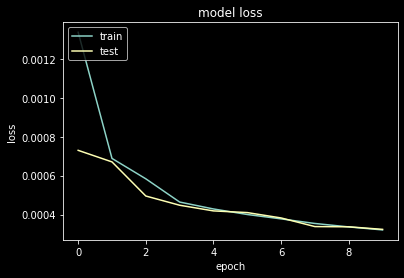

In [412]:
model_loss_report()

In [413]:
train_predictions = model.predict(X_train_scaler)

In [414]:
test_predictions = model.predict(X_test_scaler)

In [415]:
mse = np.mean(np.power(X_train_scaler - train_predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_train})

In [416]:
mse = np.mean(np.power(X_test_scaler - test_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [417]:
error_df.describe()

,reconstruction_error,true_class
count,227845.000000,227845.000000
mean,0.000332,0.001729
std,0.000841,0.041548
min,0.000015,0.000000
25%,0.000107,0.000000
50%,0.000172,0.000000
75%,0.000314,0.000000
max,0.075283,1.000000


In [418]:
error_df_test.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.000335,0.001720
std,0.001498,0.041443
min,0.000023,0.000000
25%,0.000107,0.000000
50%,0.000170,0.000000
75%,0.000312,0.000000
max,0.306714,1.000000


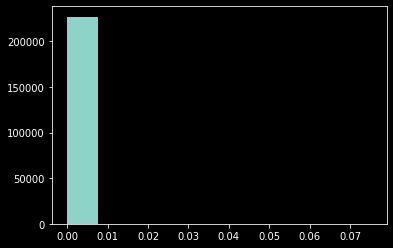

In [419]:
with plt.style.context('dark_background'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
    _ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

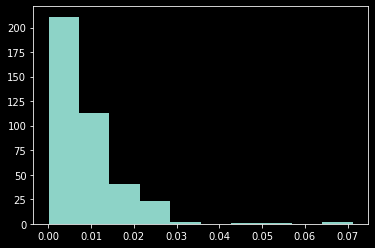

In [420]:
with plt.style.context('dark_background'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fraud_error_df = error_df[error_df['true_class'] == 1]
    _ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

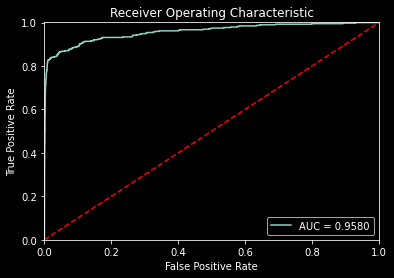

In [421]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
with plt.style.context('dark_background'):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

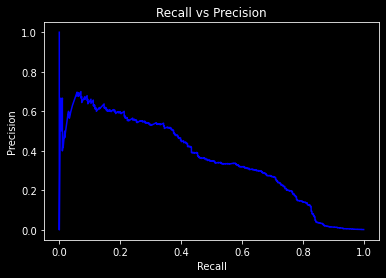

In [422]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
with plt.style.context('dark_background'):
    plt.plot(recall, precision, 'b', label='Precision-Recall curve')
    plt.title('Recall vs Precision')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

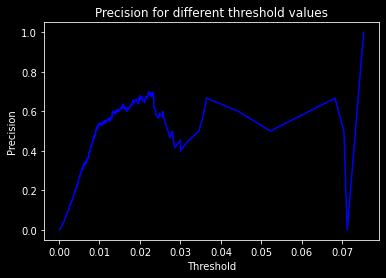

In [423]:
with plt.style.context('dark_background'):
    plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
    plt.title('Precision for different threshold values')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.show()

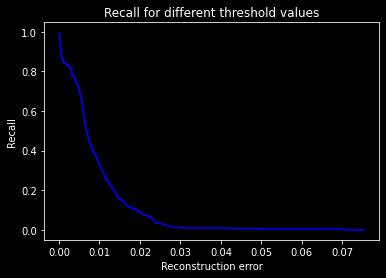

In [424]:
with plt.style.context('dark_background'):
    plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
    plt.title('Recall for different threshold values')
    plt.xlabel('Reconstruction error')
    plt.ylabel('Recall')
    plt.show()

In [458]:
threshold = 0.0015
LABELS = ["Normal", "Fraud"]

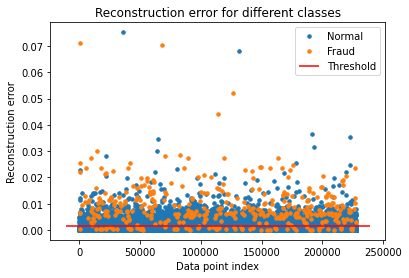

In [459]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

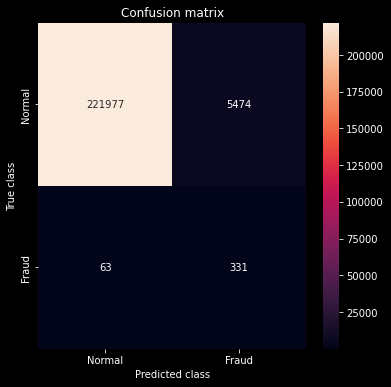

In [460]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

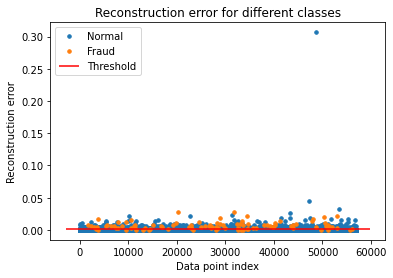

In [461]:
groups = error_df_test.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

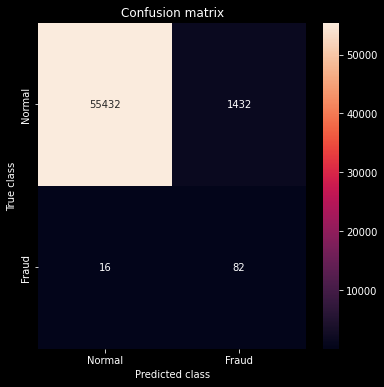

In [462]:
y_pred = [1 if e > threshold else 0 for e in error_df_test.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df_test.true_class, y_pred)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [463]:
X_train_scaler_score = np.column_stack([X_train_scaler,error_df.reconstruction_error.values])

In [464]:
X_test_scaler_score = np.column_stack([X_test_scaler,error_df_test.reconstruction_error.values])

In [465]:
lr = LogisticRegression(max_iter=10000,class_weight='balanced',C= 1,solver = 'lbfgs', penalty = 'l2')

In [466]:
matrix, class_report = model_score(model_training(lr, X_train_scaler_score, y_train, X_test_scaler_score))

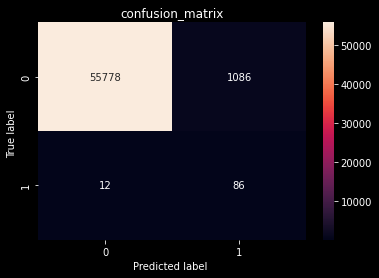

In [467]:
with plt.style.context('dark_background'):
    f = sns.heatmap(matrix, annot=True, fmt='d')
    f.set_title("confusion_matrix" , color = "white")
    plt.xlabel("Predicted label " , color = "white")
    plt.ylabel("True label " , color = "white")
    plt.show()

In [468]:
model = build_model(X_train_score_scaler.shape[1])
history = model.fit(X_train_scaler_score, y_train, validation_data = (X_test_scaler_score, y_test) , epochs = 10 , batch_size = 32)

Epoch 1/10
7121/7121 [==============================] - 94s 13ms/step - loss: 0.0108 - recall_21: 0.0000e+00 - auc_21: 0.7622 - accuracy: 0.9981 - val_loss: 0.0093 - val_recall_21: 0.0000e+00 - val_auc_21: 0.8213 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 98s 14ms/step - loss: 0.0080 - recall_21: 0.0457 - auc_21: 0.8868 - accuracy: 0.9983 - val_loss: 0.0072 - val_recall_21: 0.1327 - val_auc_21: 0.8824 - val_accuracy: 0.9984
Epoch 3/10
7121/7121 [==============================] - 98s 14ms/step - loss: 0.0061 - recall_21: 0.2563 - auc_21: 0.9108 - accuracy: 0.9986 - val_loss: 0.0060 - val_recall_21: 0.2959 - val_auc_21: 0.8977 - val_accuracy: 0.9986
Epoch 4/10
7121/7121 [==============================] - 99s 14ms/step - loss: 0.0050 - recall_21: 0.4264 - auc_21: 0.9146 - accuracy: 0.9989 - val_loss: 0.0052 - val_recall_21: 0.4694 - val_auc_21: 0.9078 - val_accuracy: 0.9989
Epoch 5/10
7121/7121 [==============================] - 113s 16ms/step - loss: 0

In [469]:
Y_pred = model.predict(X_test_score_scaler)
y_pred = np.round(Y_pred)

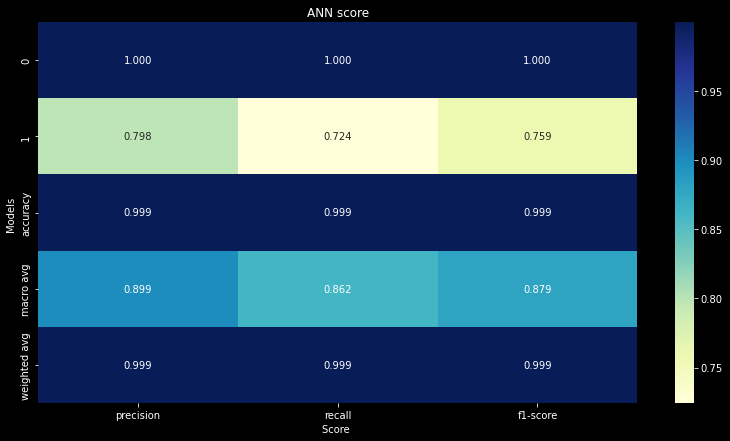

In [470]:
model_class_report('ANN')

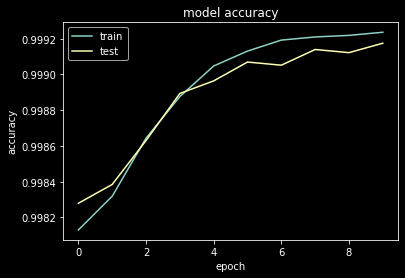

In [471]:
model_accuracy_report()

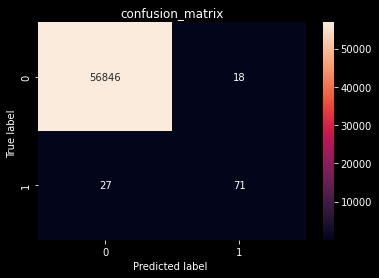

In [473]:
model_matrix()

In [474]:
ros = RandomOverSampler(random_state=1)
X_res_ad, y_res_ad = ros.fit_resample(X_train_score_scaler, y_train)

In [475]:
model = build_model(X_train_score_scaler.shape[1])
history = model.fit(X_res_ad, y_res_ad, validation_data = (X_test_scaler_score, y_test) , epochs = 5 , batch_size = 32)

Epoch 1/5
14216/14216 [==============================] - 188s 13ms/step - loss: 0.1562 - recall_22: 0.9133 - auc_22: 0.9812 - accuracy: 0.9421 - val_loss: 1.6496 - val_recall_22: 1.0000 - val_auc_22: 0.9696 - val_accuracy: 0.0971
Epoch 2/5
14216/14216 [==============================] - 212s 15ms/step - loss: 0.1275 - recall_22: 0.9280 - auc_22: 0.9881 - accuracy: 0.9511 - val_loss: 1.2878 - val_recall_22: 1.0000 - val_auc_22: 0.9683 - val_accuracy: 0.2914
Epoch 3/5
14216/14216 [==============================] - 218s 15ms/step - loss: 0.1059 - recall_22: 0.9428 - auc_22: 0.9923 - accuracy: 0.9587 - val_loss: 0.6114 - val_recall_22: 0.9592 - val_auc_22: 0.9638 - val_accuracy: 0.6925
Epoch 4/5
14216/14216 [==============================] - 213s 15ms/step - loss: 0.0814 - recall_22: 0.9591 - auc_22: 0.9959 - accuracy: 0.9683 - val_loss: 0.7278 - val_recall_22: 0.9592 - val_auc_22: 0.9631 - val_accuracy: 0.6648
Epoch 5/5
14216/14216 [==============================] - 189s 13ms/step - loss: 

In [476]:
Y_pred = model.predict(X_test_score_scaler)
y_pred = np.round(Y_pred)

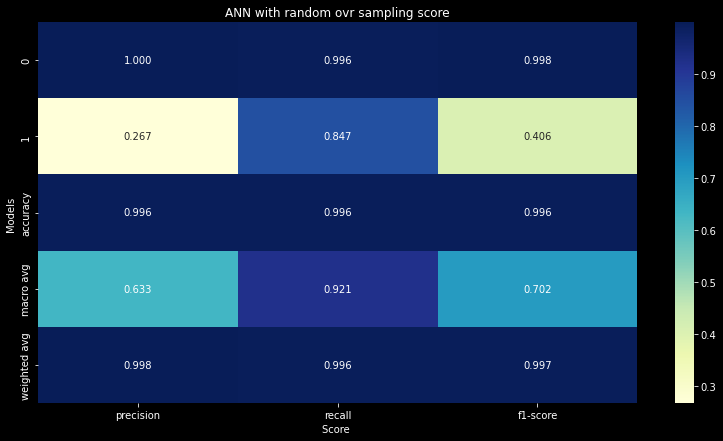

In [477]:
model_class_report('ANN with random ovr sampling')

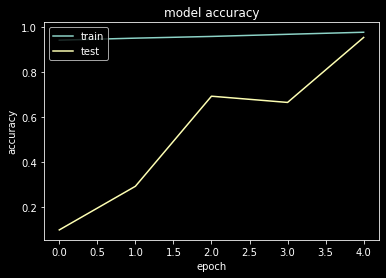

In [482]:
model_accuracy_report()

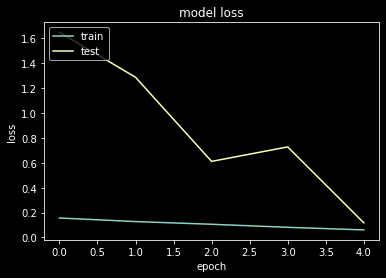

In [479]:
model_loss_report()

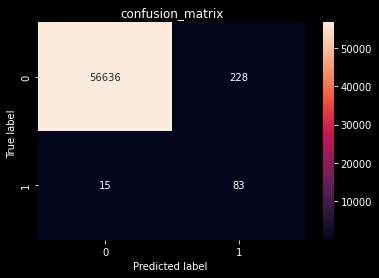

In [483]:
model_matrix()